In [3]:
import pandas as pd

#GraphDTA
test_Graph = pd.read_csv('GraphDTA/davis/davis_test.csv')
train_Graph = pd.read_csv('GraphDTA/davis/davis_train.csv')
GraphDTAData =pd.concat([test_Graph, train_Graph], ignore_index=True)

Comparing GraphDTA data to tdc paper data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tdc.multi_pred import DTI

TDCData = DTI(name = 'DAVIS')
TDCData.convert_to_log(form = 'binding')
df = TDCData.get_data()

print(f"Shape of the dataset: {df.shape}")


Found local copy...
Loading...
Done!
To log space...


Shape of the dataset: (25772, 5)


In [5]:
unique_pairs_graphdta = set(GraphDTAData[['compound_iso_smiles', 'target_sequence']].apply(tuple, axis=1))
print(f"GraphDTA Unique Pairs: {len(unique_pairs_graphdta)}")
print(GraphDTAData['compound_iso_smiles'].nunique())
print(GraphDTAData['target_sequence'].nunique())
print(GraphDTAData.columns)
unique_pairs_tdc = set(df[['Drug', 'Target','Y']].apply(tuple, axis=1))
print(f"TDC Unique Pairs: {len(unique_pairs_tdc)}")
print(df['Drug'].nunique())
print(df['Target'].nunique())



GraphDTA Unique Pairs: 25772
68
379
Index(['compound_iso_smiles', 'target_sequence', 'affinity'], dtype='object')
TDC Unique Pairs: 25772
68
379


27621
30056
Unique drugs: 68
Unique proteins: 379
Total interactions: 30056
Expected full interaction matrix size: 25772
Are all drugs tested on every protein? True
Are all proteins tested on every drug? True


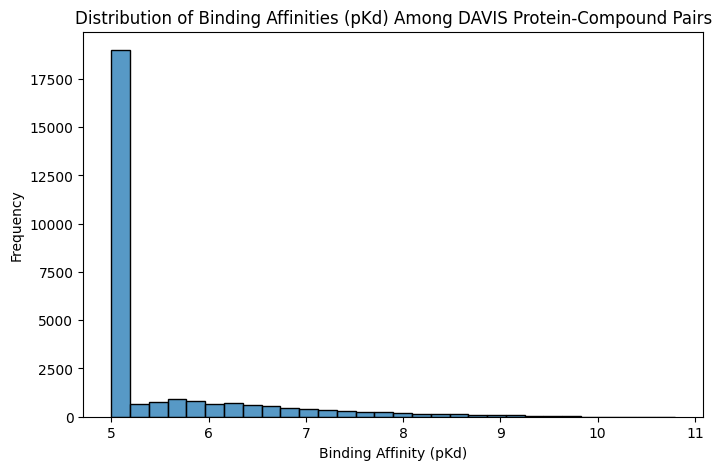

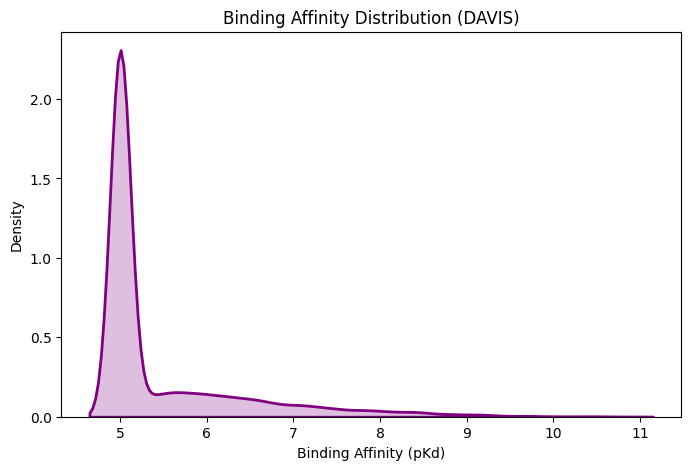

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# print(df.info())
# print(df.head())
# print("PROTEIN: ",GraphDTAData['target_sequence'].describe())
# print("DRUG", GraphDTAData['compound_iso_smiles'].describe())
unique_aff = GraphDTAData[['target_sequence', 'compound_iso_smiles', 'affinity']].drop_duplicates()
print(len(unique_aff))

unique_drugs = unique_aff['compound_iso_smiles'].nunique()
unique_proteins = unique_aff['target_sequence'].nunique()
total_pairs = len(GraphDTAData)
print((total_pairs))


print(f"Unique drugs: {unique_drugs}")
print(f"Unique proteins: {unique_proteins}")
print(f"Total interactions: {total_pairs}")
print(f"Expected full interaction matrix size: {unique_drugs * unique_proteins}")

# Check if every drug has exactly unique_proteins interactions
drug_counts = unique_aff.groupby('compound_iso_smiles')['target_sequence'].nunique()
protein_counts = unique_aff.groupby('target_sequence')['compound_iso_smiles'].nunique()

print(f"Are all drugs tested on every protein? {all(drug_counts == unique_proteins)}")
print(f"Are all proteins tested on every drug? {all(protein_counts == unique_drugs)}")


# Plot histogram of affinity values
plt.figure(figsize=(8, 5))
sns.histplot(unique_aff['affinity'], bins=30)
plt.xlabel("Binding Affinity (pKd)")
plt.ylabel("Frequency")
plt.title("Distribution of Binding Affinities (pKd) Among DAVIS Protein-Compound Pairs")
plt.show()

plt.figure(figsize=(8, 5))
sns.kdeplot(unique_aff["affinity"], fill=True, color="purple", linewidth=2)
plt.xlabel("Binding Affinity (pKd)")
plt.ylabel("Density")
plt.title("Binding Affinity Distribution (DAVIS)")
plt.show()



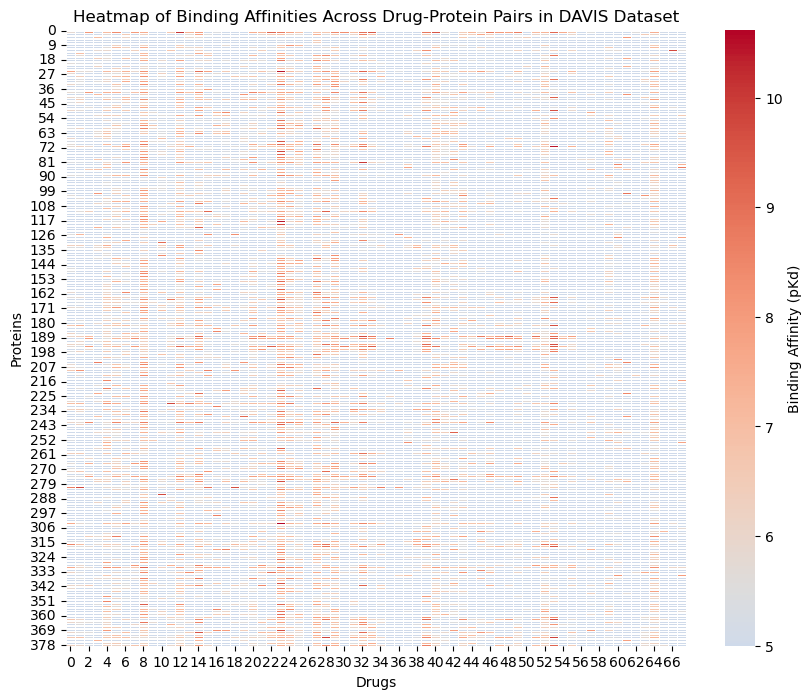

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

interaction_matrix = unique_aff.pivot_table(
    index="target_sequence", 
    columns="compound_iso_smiles", 
    values="affinity", 
    aggfunc=np.mean 
)

# Replace protein and drug labels with index numbers for visualization
interaction_matrix.index = range(len(interaction_matrix.index))
interaction_matrix.columns = range(len(interaction_matrix.columns))

# Plot heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    interaction_matrix,
    cmap="coolwarm",
    center=np.nanmean(unique_aff["affinity"]),
    linewidths=0.5,
    cbar_kws={'label': 'Binding Affinity (pKd)'} 
)

plt.xlabel("Drugs")
plt.ylabel("Proteins")
plt.title("Heatmap of Binding Affinities Across Drug-Protein Pairs in DAVIS Dataset")
plt.show()
